# Download, read, and process raw data of NOAA wind profiler
## By Camilo Rey-Sanchez and Vinnie Ribeiro
### Dec 27, 2019
#### This code 1) downloads a selected subset of the raw data of the NOAA wind profiler from the NOAA ftp server and stores it in the local machine. 2) Selects and process the SNR values for calculation of PBL code in the next code

In [105]:
# Import libraries

import pandas as pd
import os
import numpy as np
import ftplib


In [106]:
# Parameters directory

year=2018
yr=str(year)

ndays=365
ang=66.4 # inclination angle from horizon of non-vertical channels. If alredy corrected, ang=90
offset=-8 # offset from UTC

In [107]:
# Dowload data and store it in local machine

maindir=os.path.join(r"C:\PBL\Raw", yr)

In [108]:

## Fine Resolution data example
X1= pd.read_csv(r'C:\PBL\Raw\2018\003\tci18003.00w',sep='\s+',skiprows=10,nrows=44)
X1.head(5)

,HT,SPD,DIR,MET_QC,RAD,RAD.1,RAD.2,CNT,CNT.1,CNT.2,SNR,SNR.1,SNR.2,QC,QC.1,QC.2
0,0.121,1.4,43,0,0.0,0.0,-0.6,11,11,11,-5,-4,-1,0.0,0.0,0.0
1,0.179,3.0,28,0,0.0,-0.4,-1.1,11,11,11,-3,-5,-2,0.0,0.0,0.0
2,0.236,4.8,26,0,0.0,-0.7,-1.8,11,11,11,-6,-4,-4,0.0,0.0,0.0
3,0.293,4.9,28,0,-0.1,-0.6,-1.9,11,11,11,-8,-7,-7,0.0,0.0,0.0
4,0.350,3.8,31,0,-0.1,-0.4,-1.5,11,11,11,-5,-9,-5,0.0,0.0,0.0


In [109]:
## Coarse Resolution data example
X1= pd.read_csv(r'C:\PBL\Raw\2018\003\tci18003.00w',sep='\s+',skiprows=66)
X1.head(5)

,HT,SPD,DIR,MET_QC,RAD,RAD.1,RAD.2,CNT,CNT.1,CNT.2,SNR,SNR.1,SNR.2,QC,QC.1,QC.2
0,0.164,3.3,26.0,0.0,0.0,-0.4,-1.2,11.0,11.0,11.0,-3.0,-2.0,0.0,0.0,0.0,0.0
1,0.261,2.8,24.0,0.0,0.0,-0.4,-1.1,11.0,11.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.358,2.2,22.0,0.0,0.0,-0.4,-0.8,11.0,11.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
3,0.455,2.1,21.0,0.0,0.1,-0.4,-0.7,11.0,11.0,11.0,-4.0,0.0,3.0,0.0,0.0,0.0
4,0.553,1.7,46.0,0.0,0.0,0.0,-0.7,11.0,11.0,10.0,-3.0,0.0,3.0,0.0,0.0,0.0


In [111]:
## Pre-allocate annual array

yearF=np.empty((1056*ndays,16),dtype=float);yearF[:]=np.nan
yearFc=np.empty((1488*ndays,16),dtype=float);yearFc[:]=np.nan
hrall=[]
doyall=[]
hrallc=[]
doyallc=[]

d=0

# Iterate through days

for file in os.listdir(maindir):
        if file!='hourly':
            doy=int(file)
            direc=os.path.join(maindir, file)
            # Pre-allocate 
            
            day=np.empty((44*24,16),dtype=float)
            dayc=np.empty((62*24,16),dtype=float)
                        
            c=0            
            # Iterate through hours in a day
            
            for file in os.listdir(direc):
                hr=int(file[9:11])         
             
                # Fine Resolution dataset
                day[c*44:c*44+44]= pd.read_csv(os.path.join(direc, file),sep='\s+',skiprows=10,nrows=44)
                
                for i in range(44):
                    hrall.append(hr)
                    doyall.append(doy)                 
                                
                # Coarse Resolution dataset
                dayc[c*62:c*62+62]= pd.read_csv(os.path.join(direc, file),sep='\s+',skiprows=66,nrows=62)
                for i in range(62):
                    hrallc.append(hr)
                    doyallc.append(doy)
                c+=1
                
            yearF[d*1056:d*1056+1056]=day
            yearFc[d*1488:d*1488+1488]=dayc
    
print(day,day.shape)  
print(yearF,yearF.shape)
len(doyall)

[[1.21000e-01 4.00000e+00 2.43000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.79000e-01 4.90000e+00 2.45000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.36000e-01 6.10000e+00 2.49000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.46700e+00 9.99999e+05 9.99999e+05 ... 0.00000e+00 1.11000e+02
  1.11000e+02]
 [2.52400e+00 9.99999e+05 9.99999e+05 ... 0.00000e+00 1.11000e+02
  1.11000e+02]
 [2.58200e+00 9.99999e+05 9.99999e+05 ... 0.00000e+00 1.11000e+02
  1.11000e+02]] (1056, 16)
[[1.21e-01 4.00e+00 2.43e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.79e-01 4.90e+00 2.45e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.36e-01 6.10e+00 2.49e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]] (385440, 16)


380160

In [112]:
print(hrall[0:4]) 
#len(os.listdir(direc))

[0, 0, 0, 0]


In [114]:
# Define date and time variables (not sure this is the best way to do it)
import datetime as dt
timeall=[]
for i in range(len(doyall)):    
    t1=dt.datetime(year=2018,month=1,day=1,hour=hrall[i])
    t2=dt.timedelta(doyall[i]-1)
    time=t1+t2
    timeall.append(time)
    
print(timeall[200000:200060])


[datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 19, 0), datetime.datetime(2018, 7, 13, 20, 0), datetime.datetime(2018, 

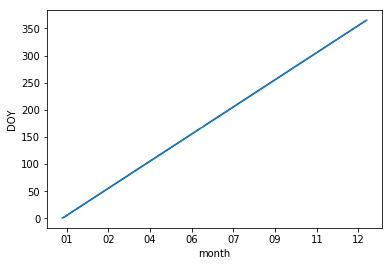

In [116]:
import matplotlib
import matplotlib.pyplot as plt
timenum=matplotlib.dates.date2num(timeall)
timenum[1:10]
len(doyall)
fig, ax = plt.subplots()
ax.plot(timenum,doyall)


import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_formatter(myFmt)

plt.ylabel('DOY')
plt.xlabel('month')

plt.show()


In [ ]:
# Extracting Signal-to-Noise ratio data (SNR) and others, and correcting heigths

snr1a=yearF[:,11];snr1a[snr1a==999999]=None
snr2a=yearF[:,12];snr2a[snr2a==999999]=None
snr3a=yearF[:,13];snr3a[snr3a==999999]=None

h=yearF[:,1];h[h==999999]=None

h2=h*np.sin(ang*np.pi/180);# Corrected height for the oblique channels
snr2c=np.interp(h2,snr2a,h);# interpolate the corrected values to the height of the vertical
snr3c=np.interp(h2,snr3a,h);# interpolate the corrected values to the height of the vertical


In [118]:
# Offset the time series to local time

ltt=len(doyall)
offs=-offset
snr=np.concatenate((snr1a.reshape(-1,1),snr3c.reshape(-1,1)),axis=1)
snr=np.concatenate((snr,snr3c.reshape(-1,1)),axis=1)
snr.shape
#snr1=np.empty((len(snr1a),1),dtype=float);
#snr1[-1]
# snr[offs:-1,1]=snr[1:ltt-offs] #offset snr is in UTC


(385440, 3)